# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(iris.target_names)
print(iris.feature_names)
print()
print(iris.target)
print(iris.keys())


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
from itertools import combinations, permutations
#permutations([0, 1, 2, 3], 3)

# 鳶尾花資料集有4個維度，選取其中3個維度分析
#['setosa' 'versicolor' 'virginica']
#['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# (ix, iy, iz)
cmb_ixyz = list(combinations([0, 1, 2, 3], 3))

print(f"(ix, iy, iz) = {cmb_ixyz}")
for (i, (ix, iy, iz)) in enumerate(cmb_ixyz):
    print(f"{i+1}:({ix}, {iy}, {iz}) = ('{iris.feature_names[ix]}', '{iris.feature_names[iy]}', '{iris.feature_names[iz]}')")


(ix, iy, iz) = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]
1:(0, 1, 2) = ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)')
2:(0, 1, 3) = ('sepal length (cm)', 'sepal width (cm)', 'petal width (cm)')
3:(0, 2, 3) = ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')
4:(1, 2, 3) = ('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

np.random.seed(5)

%matplotlib inline

In [4]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))
             ]
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

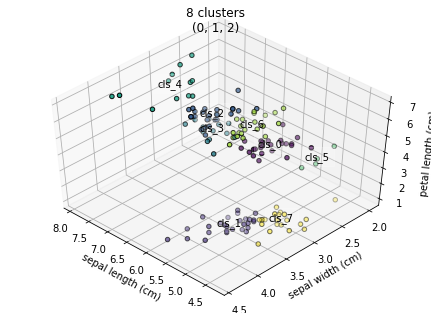

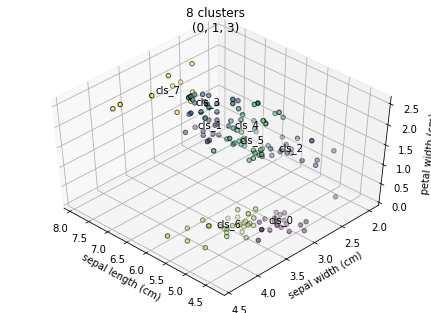

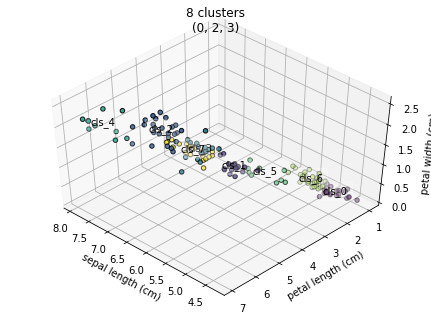

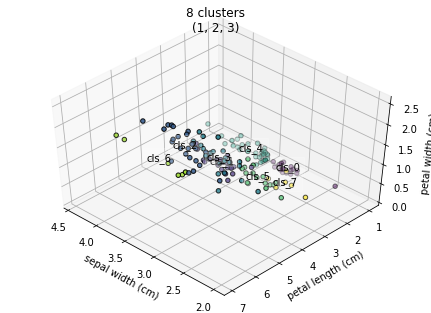

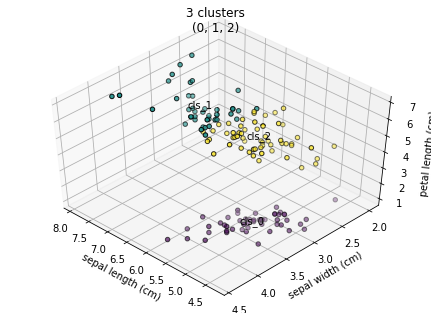

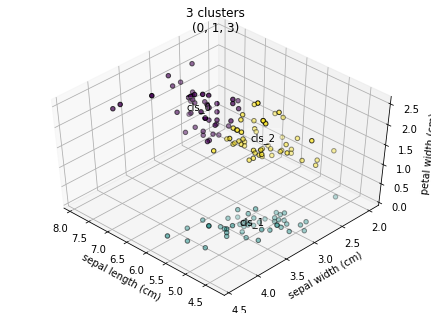

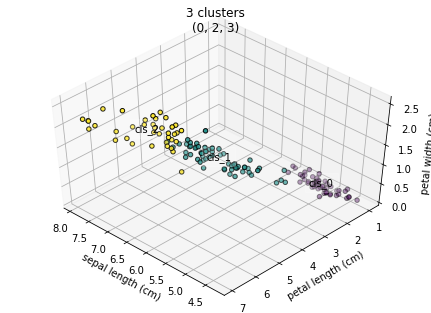

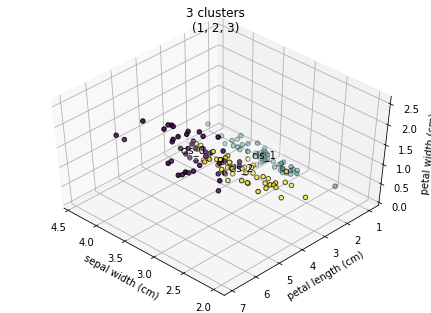

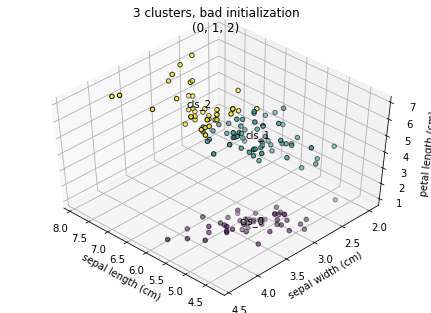

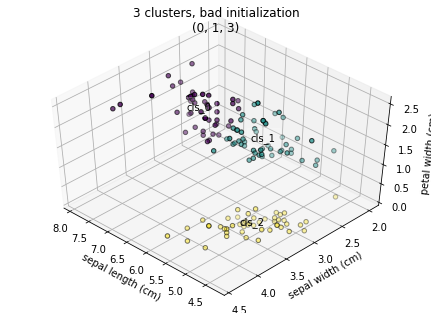

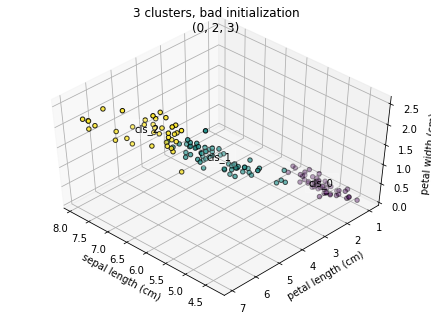

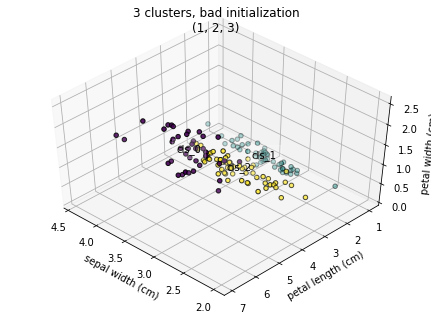

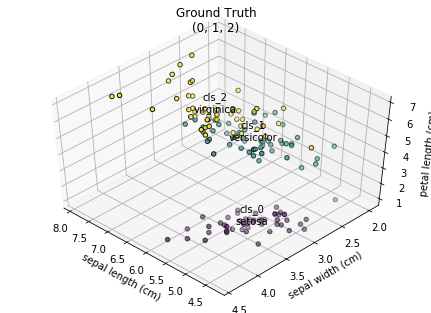

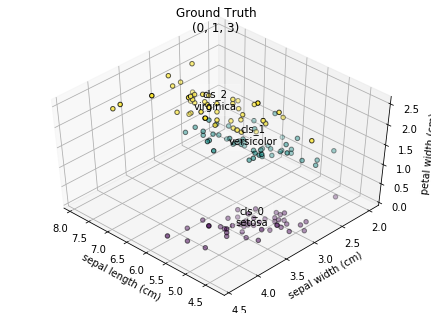

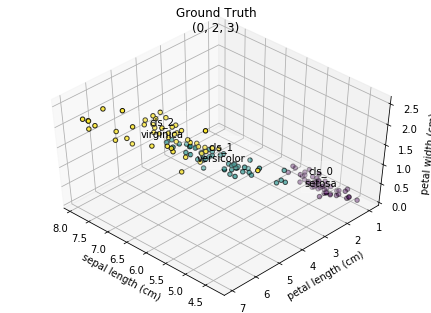

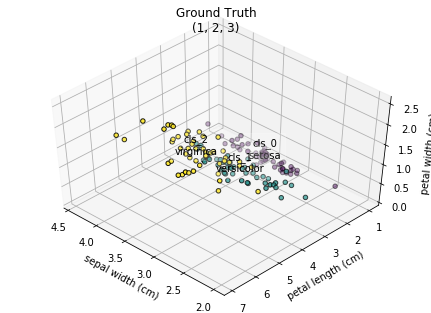

In [5]:
ifig = 0
irows = len(estimators)+1     # plus ground truth plot
icols = 4

fig, axes = plt.subplots(irows, icols)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.05)

for (i, (est_name, est)) in enumerate(estimators):
    for (j, (ix, iy, iz)) in enumerate(cmb_ixyz):
        ifig += 1
    
        fig = plt.figure(ifig)
        
        axes[i][j] = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

        ## fit data
        x = X[:, [ix, iy, iz]]
        est.fit(x)

        labels = est.labels_

#        print(f"{i+1}:({ix}, {iy}, {iz}) = ('{iris.feature_names[ix]}', '{iris.feature_names[iy]}', '{iris.feature_names[iz]}')")
#        print(f"labels={labels}")
#        print(f"target={iris.target}")
#        print()

        label_codes = np.unique(labels)
        name_labels = [(f"cls_{code}", code) for code in label_codes]
        
        for name, label in name_labels:
            axes[i][j].text3D(
                      x[labels == label, 0].mean(),
                      x[labels == label, 1].mean(),
                      x[labels == label, 2].mean(), 
                      name,
                      horizontalalignment='center',
                      bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

        axes[i][j].scatter(x[:, 0], x[:, 1], x[:, 2],
                   c=labels.astype(np.float), edgecolor='k')

        #axes[i][j].w_xaxis.set_ticklabels([])
        #axes[i][j].w_yaxis.set_ticklabels([])
        #axes[i][j].w_zaxis.set_ticklabels([])
        axes[i][j].set_xlabel(iris.feature_names[ix])
        axes[i][j].set_ylabel(iris.feature_names[iy])
        axes[i][j].set_zlabel(iris.feature_names[iz])
        axes[i][j].set_title(f"{titles[i]}\n({ix}, {iy}, {iz})")
        #axes[i][j].dist = 12
        
        #fig.show()
    
# Plot the ground truth
i = len(estimators)
for (j, (ix, iy, iz)) in enumerate(cmb_ixyz):
    ifig += 1

    fig = plt.figure(ifig)

    axes[i][j] = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    label_codes = np.unique(iris.target)
    name_labels = [(f"cls_{code}\n{iris.target_names[code]}", code) for code in label_codes]

    for name, label in name_labels:
        axes[i][j].text3D(
                  X[y == label, ix].mean(),
                  X[y == label, iy].mean(),
                  X[y == label, iz].mean(), 
                  name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

    # Reorder the labels to have colors matching the cluster results
    #y = np.choose(y, [1, 2, 0]).astype(np.float)
    #ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')
    axes[i][j].scatter(X[:, ix], X[:, iy], X[:, iz], c=y, edgecolor='k')

    #axes[i][j].w_xaxis.set_ticklabels([])
    #axes[i][j].w_yaxis.set_ticklabels([])
    #axes[i][j].w_zaxis.set_ticklabels([])
    axes[i][j].set_xlabel(iris.feature_names[ix])
    axes[i][j].set_ylabel(iris.feature_names[iy])
    axes[i][j].set_zlabel(iris.feature_names[iz])
    axes[i][j].set_title(f"Ground Truth\n({ix}, {iy}, {iz})")
    #axes[i][j].dist = 12
        
    #fig.show()
plt.show()


ref:  
[K-means Clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py)